```
Copyright (C) 2020 Le Pham Tuyen. All rights reserved.
This code is only intended for the competition hosted by Dacon and LG "https://dacon.io/competitions/official/235612/overview/"
Anyone who wishes to use this code for a commercial use should contact the developer listed below.

Developer: tuyenple
Developer's email: tuyenkhu@gmail.com
```


In [24]:
import pandas as pd 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["font.family"] = 'NanumGothicCoding'

In [25]:
stock_df = pd.read_csv('./data/stock.csv')
max_count_df = pd.read_csv('./data/max_count.csv')
submission_df = pd.read_csv('./data/sample_submission.csv')
submission_df['time'] = pd.to_datetime(submission_df['time'])
order_df = pd.read_csv('./data/order.csv')
for i in range(31):
    order_df.loc[91 + i, :] = ['2020-07-01', 0, 0, 0, 0]
order_df['time'] = pd.to_datetime(order_df['time']) + pd.Timedelta(hours=18)

In [26]:
order_melt_x = order_df.melt(id_vars=["time"],value_name='값')

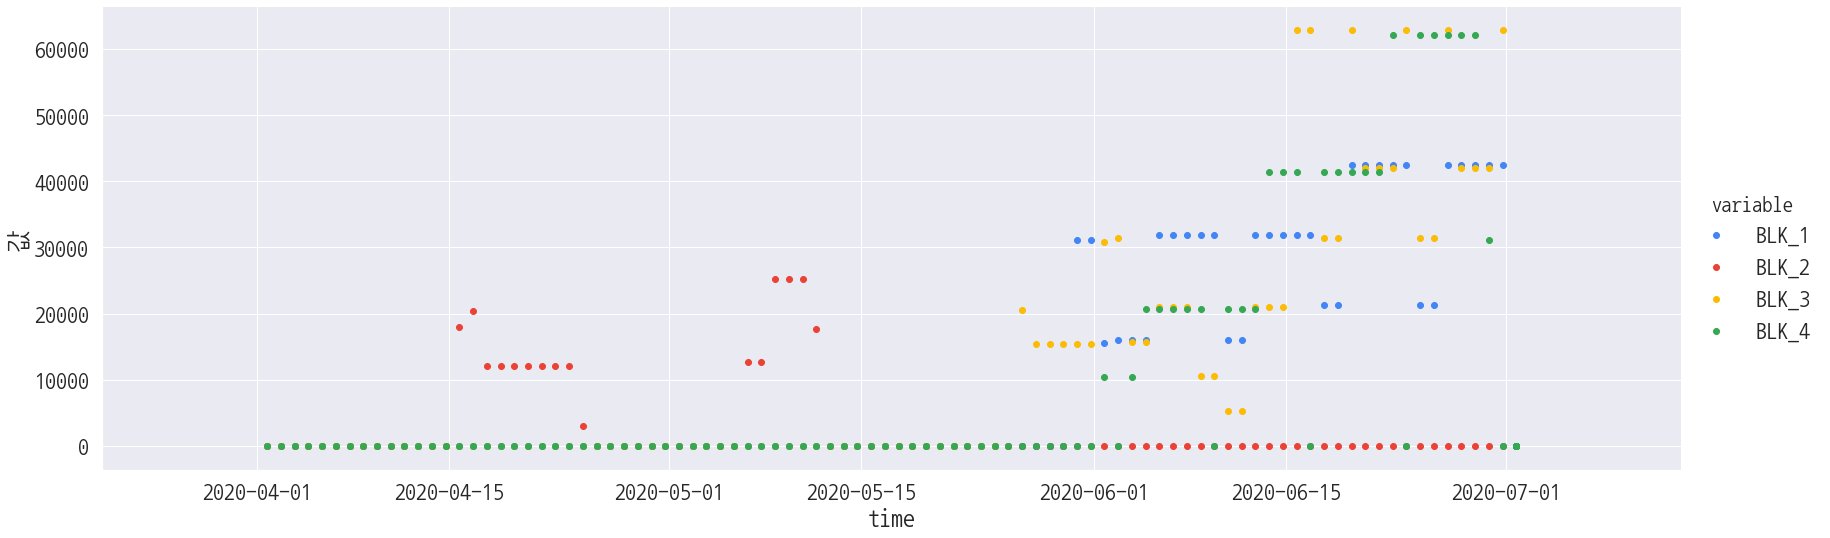

In [27]:
sns.set(font_scale=2, font = 'NanumGothicCoding' )  
g = sns.FacetGrid(order_melt_x, 
                  hue="variable", 
                  aspect=3, 
                  height=1.5, 
                  size = 8,
                  palette=['#4285F4','#EA4335','#FBBC05','#34A853'] #google colors
                 )
g.map(plt.scatter, "time", "값", alpha=1)
g.add_legend()
plt.show()

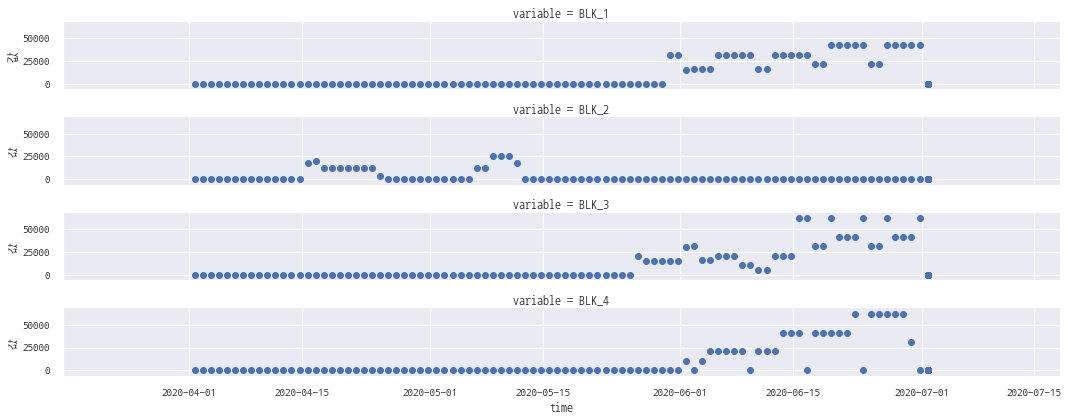

In [28]:
import seaborn as sns
sns.set(font_scale=1.0, font = 'NanumGothicCoding' )  
g = sns.FacetGrid(order_melt_x, 
                  row="variable", 
                  aspect=10, 
                  height=1.5, 
                 )
g.map(plt.scatter, "time", "값", alpha=1)
plt.show()

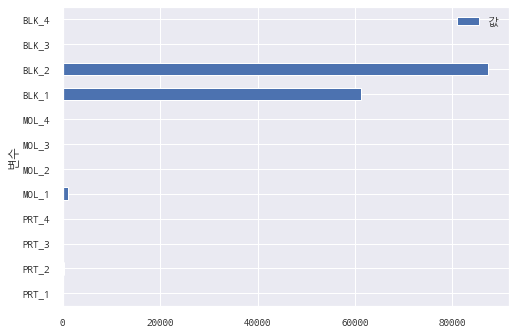

In [29]:
data = pd.DataFrame(stock_df.T)
data["변수"] = data.index.values
data.reset_index(inplace=True,drop=True)
data.columns = [ "값", "변수"]
data.plot.barh(x="변수", y="값")

In [30]:
remove_0_max_count_df = max_count_df[max_count_df["count"]>0] 
only_0_max_count_df = max_count_df[max_count_df["count"]==0] 

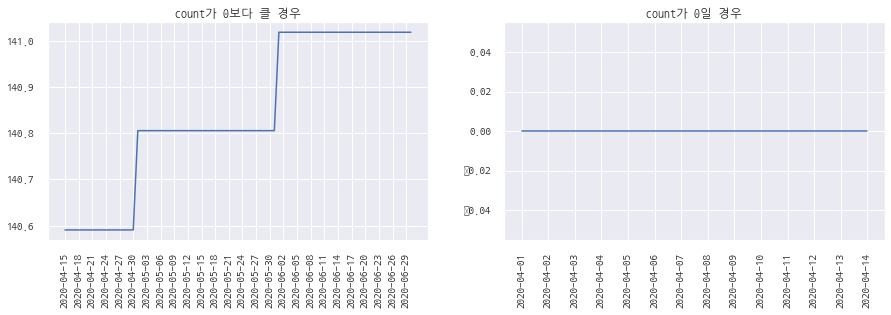

In [31]:
fig , ax = plt.subplots(1,2, figsize=(15,4))
axes = ax.flatten()
axes[0].plot(remove_0_max_count_df["date"] , remove_0_max_count_df["count"])
axes[0].set_xticks(ticks=remove_0_max_count_df["date"][::3].values)
axes[0].set_xticklabels(remove_0_max_count_df["date"][::3].values, rotation=90)
axes[0].set_title("count가 0보다 클 경우")
axes[1].plot(only_0_max_count_df["date"] , only_0_max_count_df["count"])
axes[1].set_xticks(ticks=only_0_max_count_df["date"].values)
axes[1].set_xticklabels(only_0_max_count_df["date"].values, rotation=90)
axes[1].set_title("count가 0일 경우")
plt.show()

In [32]:
sample_generated_submission = pd.read_csv('./sample_generated_submission.csv')
sample_generated_submission.head()

,time,PRT_1,PRT_2,PRT_3,PRT_4,Event_A,MOL_A,Event_B,MOL_B
0,2020-04-01 00:00:00,1,4,1,1,CHECK_2,0.0,CHECK_2,0.0
1,2020-04-01 01:00:00,1,4,1,1,CHECK_2,0.0,CHECK_2,0.0
2,2020-04-01 02:00:00,1,1,1,1,CHECK_2,0.0,CHECK_2,0.0
3,2020-04-01 03:00:00,1,1,1,1,CHECK_2,0.0,CHECK_2,0.0
4,2020-04-01 04:00:00,1,4,1,1,CHECK_2,0.0,CHECK_2,0.0


In [33]:
import numpy as np
def extract_event_by_time(col) :
    line_event = sample_generated_submission[['time',col]]
    checks = [f"CHECK_{i}" for i in range(1,5)]
    zero_matrix = np.zeros((len(line_event), len(checks)))
    dummies = pd.DataFrame(zero_matrix, columns=checks)
    for i, gen in enumerate(line_event[col]):
        indices = dummies.columns.get_indexer([gen])
        dummies.iloc[i, indices] = 1
    dummies.index = line_event.time
    dummies.index.name= "time"
    dummies.columns.name= "event"
    return dummies

def heatmap(data,ax, title ='EVENT Heatmap of Line A',cbar=True) :
    g = sns.heatmap(data.T,ax=ax, cmap='YlGnBu',cbar=cbar)
    g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 15)
    g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = 10)
    ax.set_title(title, fontsize=30)
    b, t = g.set_ylim()
    b += 0.5 
    t -= 0.5 
    g.set_ylim(b, t) 
    return g


In [34]:
event_a = extract_event_by_time("Event_A")
event_b = extract_event_by_time("Event_B")

In [35]:
result = event_a.apply(pd.value_counts).fillna(0)
result

event,CHECK_1,CHECK_2,CHECK_3,CHECK_4
0.0,2128,1848,2072,504
1.0,56,336,112,1680


In [36]:
stock_df

,PRT_1,PRT_2,PRT_3,PRT_4,MOL_1,MOL_2,MOL_3,MOL_4,BLK_1,BLK_2,BLK_3,BLK_4
0,0,258,0,0,1086,0,0,0,61158,87279,0,0


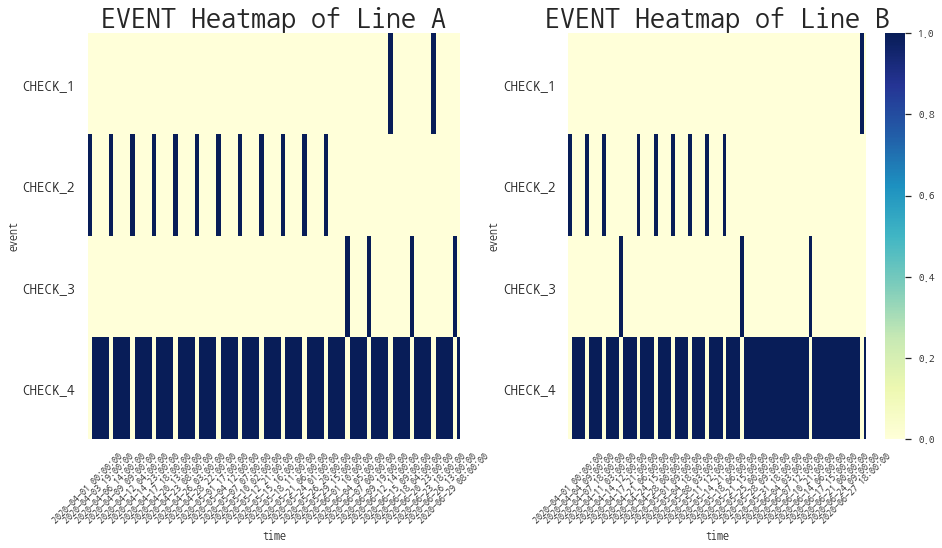

In [37]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
plt.subplots_adjust(left=0.2, bottom=0.05, right=0.99, 
                    top=0.99, wspace=0.29, hspace=0.3)
axes = ax.flatten()
heatmap(event_a , axes[0], 'EVENT Heatmap of Line A',False)
heatmap(event_b , axes[1], 'EVENT Heatmap of Line B',True)
plt.show()

In [38]:
BOOL = (sample_generated_submission["Event_A"] != "PROCESS") & ( sample_generated_submission["Event_B"] != "PROCESS")
prt_melt_x = sample_generated_submission[BOOL].melt(id_vars=["time"],
                                  value_vars = [f"PRT_{i}" for i in range(1,5)],
                                  value_name='값')
prt_melt_x.head()

,time,variable,값
0,2020-04-01 00:00:00,PRT_1,1
1,2020-04-01 01:00:00,PRT_1,1
2,2020-04-01 02:00:00,PRT_1,1
3,2020-04-01 03:00:00,PRT_1,1
4,2020-04-01 04:00:00,PRT_1,1


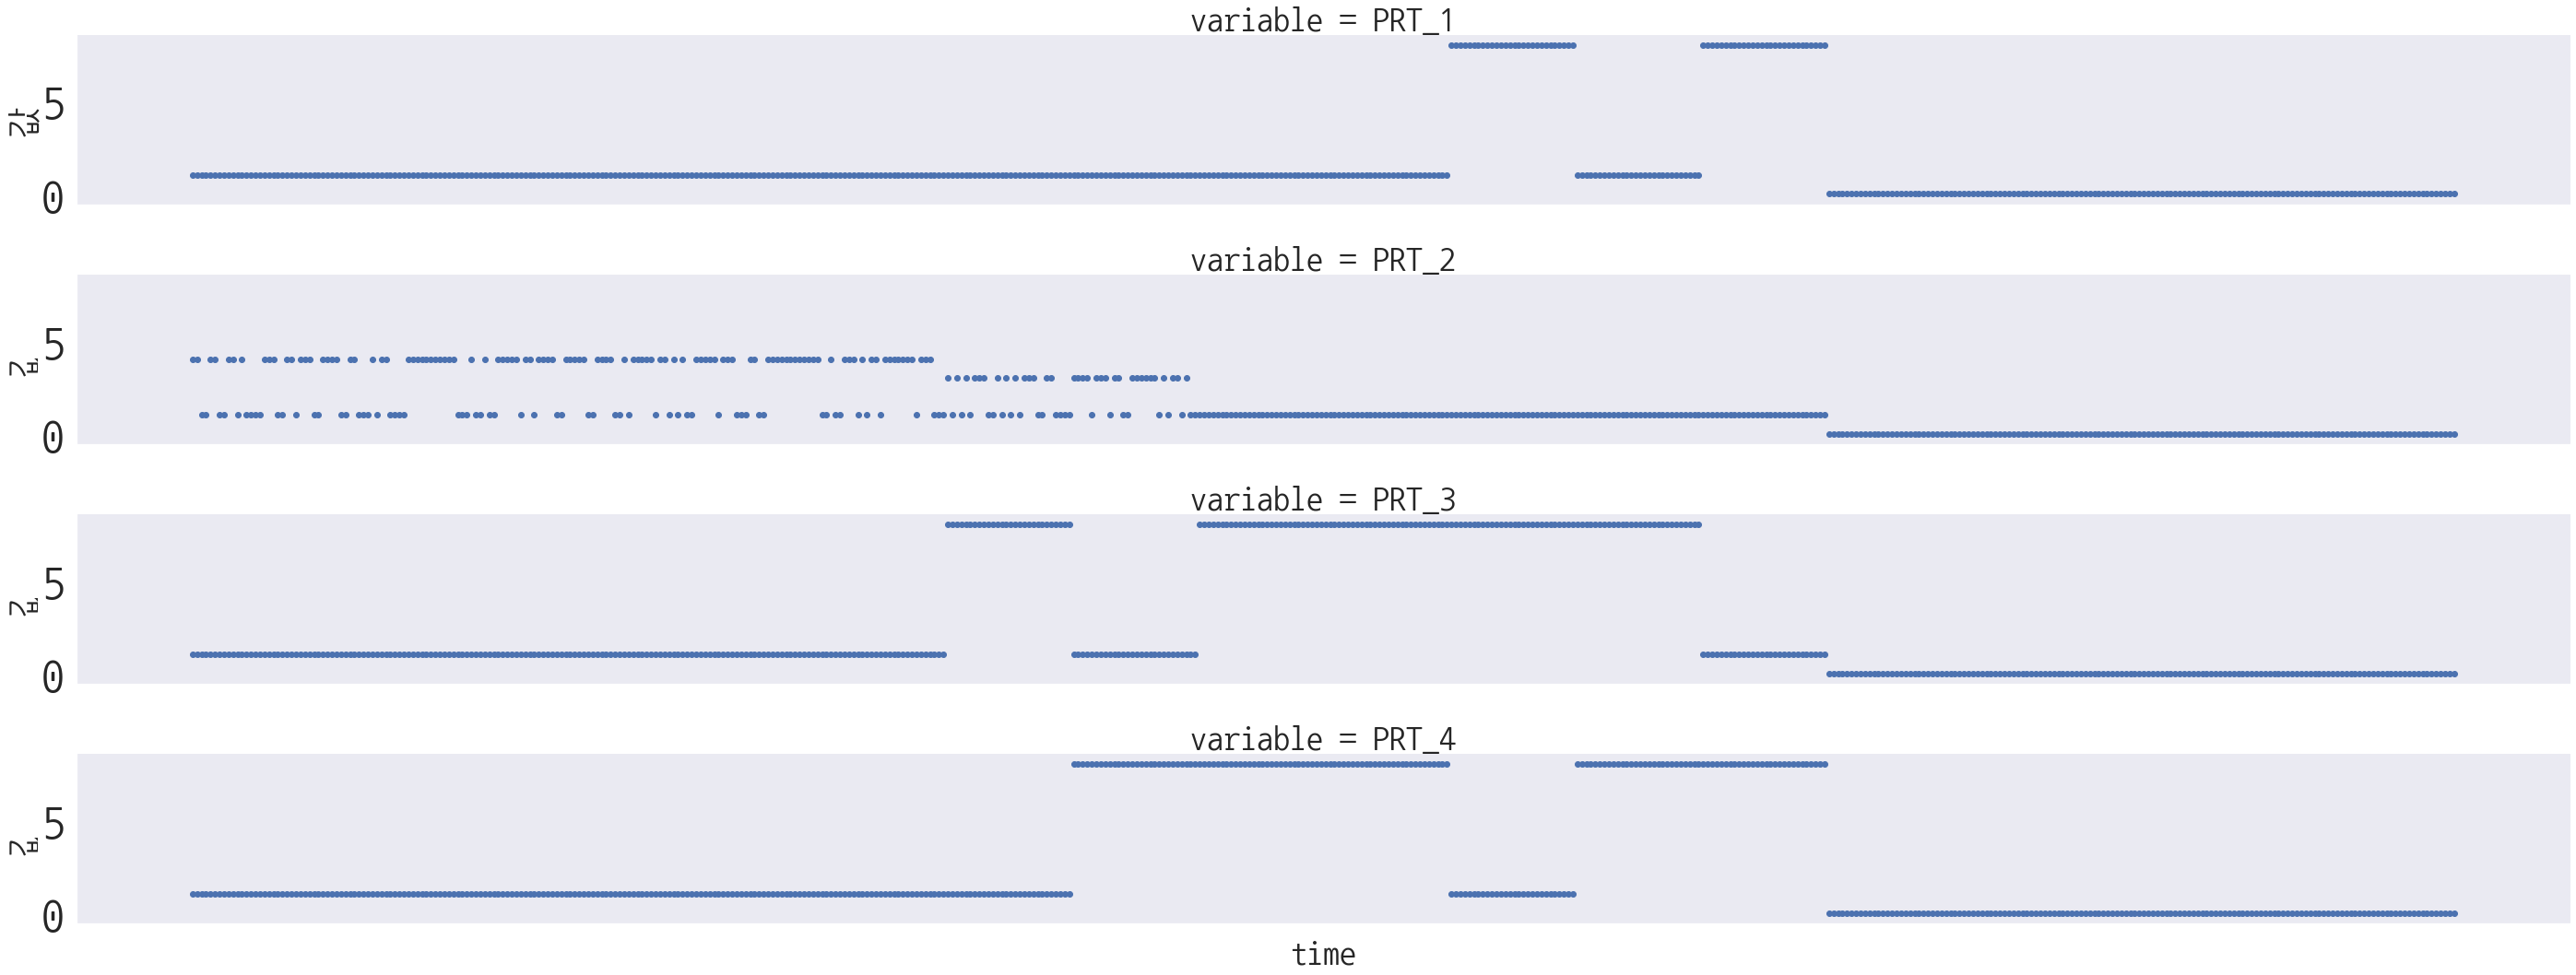

In [39]:
sns.set(font_scale=3.0, font = 'NanumGothicCoding' ,style="dark")  
g = sns.FacetGrid(prt_melt_x, 
                  row="variable", 
                  aspect=10, 
                  height =4 ,
                 )
g.map(plt.scatter,"time","값", alpha=1)
g.set_xticklabels(labels = [] ,rotation=30)
g.set_yticklabels(fontsize = 50)
plt.show()

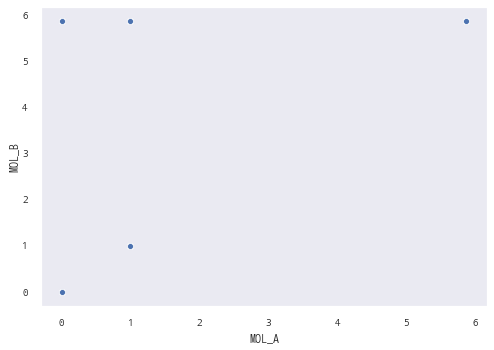

In [40]:
sns.set(font_scale=1.0, font = 'NanumGothicCoding' ,style="dark")  
sns.scatterplot("MOL_A","MOL_B",data = sample_generated_submission)
plt.show()

In [41]:
result = []
idx = 0 
while True :
    process = sample_generated_submission.iloc[(28+98)*idx:(28+98)*(idx+1),]
    uni = process[["Event_A","Event_B"]].\
    apply(lambda x : np.unique(x[~(x=="PROCESS")]) ,axis=0)
    uni_series = pd.Series(uni.values.reshape(-1,),index=["Event_A","Event_B"])
    result.append(pd.DataFrame(process.sum().append(uni_series)).T)
    idx +=1
    if idx == 18 :
        break

In [42]:
results = pd.concat(result,axis=0).reset_index(drop=True)
results.index.name = "공정 주기"
results.index = results.index + 1
results

,time,PRT_1,PRT_2,PRT_3,PRT_4,Event_A,MOL_A,Event_B,MOL_B,Event_A,Event_B
공정 주기,,,,,,,,,,,
1,2020-04-01 00:00:002020-04-01 01:00:002020-04-...,126,279,126,126,CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHEC...,0,CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHEC...,0,CHECK_2,CHECK_2
2,2020-04-06 06:00:002020-04-06 07:00:002020-04-...,126,300,126,126,CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHEC...,0,CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHEC...,0,CHECK_2,CHECK_2
3,2020-04-11 12:00:002020-04-11 13:00:002020-04-...,126,306,126,126,CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHEC...,0,CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHEC...,0,CHECK_2,CHECK_2
4,2020-04-16 18:00:002020-04-16 19:00:002020-04-...,126,324,126,126,CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHEC...,0,CHECK_3CHECK_3CHECK_3CHECK_3CHECK_3CHECK_3CHEC...,0,CHECK_2,CHECK_3
5,2020-04-22 00:00:002020-04-22 01:00:002020-04-...,126,342,126,126,CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHEC...,40,CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHEC...,40,CHECK_2,CHECK_2
6,2020-04-27 06:00:002020-04-27 07:00:002020-04-...,126,298,273,126,CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHEC...,56,CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHEC...,56,CHECK_2,CHECK_2
7,2020-05-02 12:00:002020-05-02 13:00:002020-05-...,126,254,665,273,CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHEC...,60,CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHEC...,60,CHECK_2,CHECK_2
8,2020-05-07 18:00:002020-05-07 19:00:002020-05-...,126,234,273,812,CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHEC...,65,CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHEC...,65,CHECK_2,CHECK_2
9,2020-05-13 00:00:002020-05-13 01:00:002020-05-...,126,126,812,812,CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHEC...,69,CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHECK_2CHEC...,69,CHECK_2,CHECK_2


In [43]:
import pandas_profiling
sample_generated_submission["time"] = pd.to_datetime(sample_generated_submission["time"])

In [44]:
sample_generated_submission.profile_report()